Autoregression is a time series model that uses observations from previous time steps as input to a regression equation to predict the value at the next time step.

In [23]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings("ignore")

In [24]:
df = pd.read_excel ('monthly export amount2.xlsx')
df

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,155
0,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,155
1,2007-01-01 00:00:00,2007-02-01 00:00:00,2007-03-01 00:00:00,2007-04-01 00:00:00,2007-05-01 00:00:00,2007-06-01 00:00:00,2007-07-01 00:00:00,2007-08-01 00:00:00,2007-09-01 00:00:00,2007-10-01 00:00:00,...,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00
2,38223018,35866026,41532719,39443013,39852981,39387232,35048576,37669038,35534156,37291389,...,51935479,49858132,55511984,51068508,48912380,49320631,49234963,50888374,47479186,49775699


Because the data frame had 3 rows and 156 columns, it should be transposed to 3 columns which one of them is date and the other amounts, also one column as an ID.

In [25]:
df =df.transpose()

In [26]:
df.columns = ['ID','Datetime','Total']
df

,ID,Datetime,Total
0,0,2007-01-01,38223018
1,1,2007-02-01,35866026
2,2,2007-03-01,41532719
3,3,2007-04-01,39443013
4,4,2007-05-01,39852981
...,...,...,...
151,151,2019-08-01,49320631
152,152,2019-09-01,49234963
153,153,2019-10-01,50888374
154,154,2019-11-01,47479186


In [27]:
df.dtypes

ID                  object
Datetime    datetime64[ns]
Total               object
dtype: object

First of all, the type of each column should be determined

In [28]:
df.Datetime = pd.to_datetime(df.Datetime,format='%Y-%m-%d %H:%M') 
df.index = df.Datetime

In [29]:
df['ID'] = df['ID'].astype(np.float64)
df['Total'] = df['Total'].astype(np.float64)

Then split the test and train parts, which 2019 is the test and the previous 12 years are train.

In [30]:
import math
total_size=len(df)
split = 144 / 156
train_size=math.floor(split*total_size)
train=df.head(train_size)
test=df.tail(len(df) -train_size)

Importing the Autoregression model and fit it to the train part.
An autoregressive model is a linear function when a value from a time series is regressed on previous values from that same time series. for example, yt on yt−1:

yt=β0+β1yt−1+ϵt.


In [31]:
from statsmodels.tsa.ar_model import AR

model = AR(train.Total)
fit1 = model.fit()
y_hat = test.copy()
y_hat['AR'] = fit1.predict(start=len(train), end=len(train)+len(test)-1)

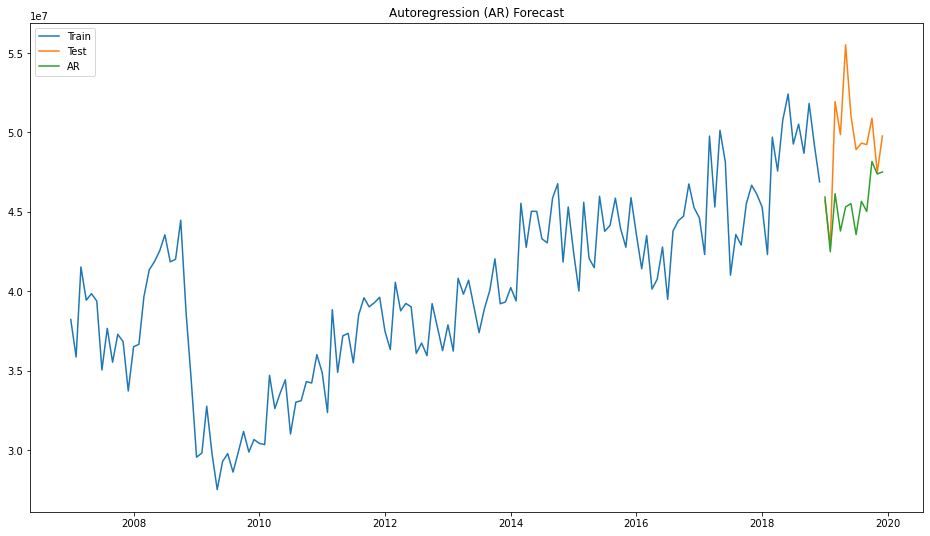

In [32]:
#Plotting data
plt.figure(figsize=(16,9))
plt.plot(train.index, train['Total'], label='Train')
plt.plot(test.index,test['Total'], label='Test')
plt.plot(y_hat.index,y_hat['AR'], label='AR')
plt.legend(loc='upper left')
plt.title("Autoregression (AR) Forecast")
plt.show()

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results.
The formula is:
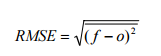

Because in this dataframe, all the data points are amounts in billion, so the RMSE is shown a big amount. So, it's better to divide it to 10000000 to change in range 0~1.

In [33]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Total, y_hat.AR))/10000000
print('RMSE = '+str(rms))

RMSE = 0.4809910472091684


Now, trying the same model to the import data.

In [34]:
df2 = pd.read_excel ('monthly import amount2.xlsx')
df2

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,155
0,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,155
1,2007-01-01 00:00:00,2007-02-01 00:00:00,2007-03-01 00:00:00,2007-04-01 00:00:00,2007-05-01 00:00:00,2007-06-01 00:00:00,2007-07-01 00:00:00,2007-08-01 00:00:00,2007-09-01 00:00:00,2007-10-01 00:00:00,...,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00
2,32224562,32242267,37580303,34869515,35548764,34407253,32246446,34833597,33163668,35329980,...,53547292,52060147,54210207,50668652,49910283,51815887,49366806,51827652,47939304,45670220


In [35]:
df2 =df2.transpose()

In [36]:
df2.columns = ['ID','Datetime','Total']
df2

,ID,Datetime,Total
0,0,2007-01-01,32224562
1,1,2007-02-01,32242267
2,2,2007-03-01,37580303
3,3,2007-04-01,34869515
4,4,2007-05-01,35548764
...,...,...,...
151,151,2019-08-01,51815887
152,152,2019-09-01,49366806
153,153,2019-10-01,51827652
154,154,2019-11-01,47939304


In [37]:
df2.Datetime = pd.to_datetime(df2.Datetime,format='%Y-%m-%d %H:%M') 
df2.index = df2.Datetime

In [38]:
df2['ID'] = df2['ID'].astype(np.float64)
df2['Total'] = df2['Total'].astype(np.float64)

In [41]:
total_size_2=len(df2)
split = 144 / 156
train_size_2 = math.floor(split*total_size_2)
train_2 = df2.head(train_size_2)
test_2 = df2.tail(len(df2) - train_size_2)

In [43]:
model_2 = AR(train_2.Total)
fit_2 = model_2.fit()
y_hat2 = test_2.copy()
y_hat2['AR'] = fit_2.predict(start=len(train_2), end=len(train_2)+len(test_2)-1)

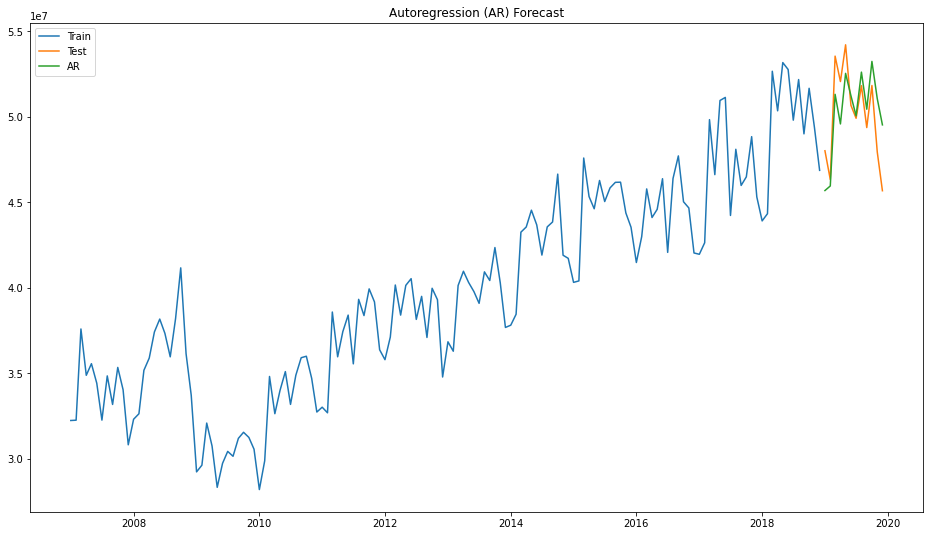

In [44]:
plt.figure(figsize=(16,9))
plt.plot(train_2.index, train_2['Total'], label='Train')
plt.plot(test_2.index,test_2['Total'], label='Test')
plt.plot(y_hat2.index,y_hat2['AR'], label='AR')
plt.legend(loc='upper left')
plt.title("Autoregression (AR) Forecast")
plt.show()

In [46]:
rms = sqrt(mean_squared_error(test_2.Total, y_hat2.AR))/10000000
print('RMSE = '+str(rms))

RMSE = 0.20044944622926683
